In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/train.csv', sep=',')

# 不要なcolumnを削除
no_required_columns = np.array(['PassengerId', 'Name', 'Ticket', 'Cabin'])
for column_name in no_required_columns:
    dataset = dataset.drop(column_name, axis=1)

# 欠損値の確認
print(dataset.isnull().sum())

# Embarkedの欠損率は約2%... 消すか
dataset = dataset.dropna(subset=['Embarked'])

# Sex column, Embarkedをエンコーディング
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked'] = label_encoder.fit_transform(dataset['Embarked'])

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


Text(0.5, 1.0, 'Fare')

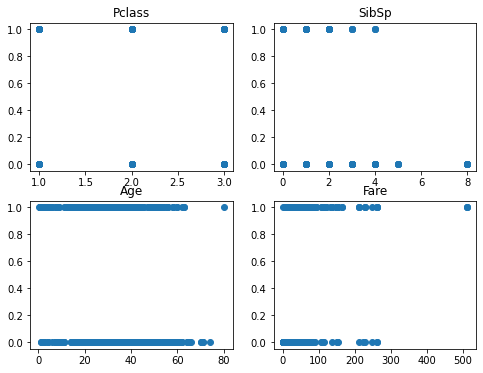

In [3]:
# datastの可視化
fix, ax = plt.subplots(2,2, figsize=(8,6))
ax[0,0].scatter(dataset['Pclass'], dataset['Survived'])
ax[0,0].set_title('Pclass')
ax[0,1].scatter(dataset['SibSp'], dataset['Survived'])
ax[0,1].set_title('SibSp')
ax[1,0].scatter(dataset['Age'], dataset['Survived'])
ax[1,0].set_title('Age')
ax[1,1].scatter(dataset['Fare'], dataset['Survived'])
ax[1,1].set_title('Fare')

In [4]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

# Ageの欠損値にはpandaではなくscikit-learnのライブラリを使用
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
X = imputer.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logi_classifier = LogisticRegression()
logi_classifier.fit(X_train, y_train)
y_pred = logi_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
def create_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(f'accuracy_score = {accuracy_score(y_test,y_pred):.5f}')

create_confusion_matrix(y_test, y_pred)

[[112  13]
 [ 35  63]]
accuracy_score = 0.78475


In [8]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
k_classifier = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=1)
k_classifier.fit(X_train, y_train)
y_pred = k_classifier.predict(X_test)

create_confusion_matrix(y_test, y_pred)

[[113  12]
 [ 62  36]]
accuracy_score = 0.66816


In [9]:
# Support Vector Machine
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

create_confusion_matrix(y_test, y_pred)

[[107  18]
 [ 38  60]]
accuracy_score = 0.74888


In [103]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()
naive_classifier.fit(X_train, y_train)
y_pred = naive_classifier.predict(X_test)

create_confusion_matrix(y_test, y_pred)

[[110  20]
 [ 30  63]]
accuracy_score = 0.77578


In [13]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rndm_classifier = RandomForestClassifier(n_estimators=2, criterion='entropy', random_state=0)
rndm_classifier.fit(X_train, y_train)
y_pred = rndm_classifier.predict(X_test)

create_confusion_matrix(y_test, y_pred)

[[118   7]
 [ 44  54]]
accuracy_score = 0.77130
